### Machine Learning Final Report

Amoolya Thummala, Alexander Golden, Jake Kim

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sb

In [3]:
import os
print(os.path.exists("/Users/strawberry/Machine Learning 24/Lectures/london_crime.csv"))

True


In [4]:
data = pd.read_csv("london_crime.csv")

print(data.head())
print(data.info())

                   MajorText                        MinorText  \
0  ARSON AND CRIMINAL DAMAGE                            ARSON   
1  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE   
2                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY   
3                   BURGLARY           BURGLARY IN A DWELLING   
4              DRUG OFFENCES              POSSESSION OF DRUGS   

            BoroughName  Apr-10  May-10  Jun-10  Jul-10  Aug-10  Sep-10  \
0  Barking and Dagenham       6       5      11      10       6       6   
1  Barking and Dagenham     208     190     218     217     203     161   
2  Barking and Dagenham      49      58      58      46      46      51   
3  Barking and Dagenham     118     102     124     137     153     136   
4  Barking and Dagenham      76      64      82      72      98      87   

   Oct-10  ...  Nov-21  Dec-21  Jan-22  Feb-22  Mar-22  Apr-22  May-22  \
0      13  ...       5       1       3       3       2       5       6   
1     196 

In [5]:
# melting the dataframe since the dates are columns. melting makes it easier to sort by date

data_melted = pd.melt(
    data,
    id_vars=['MajorText', 'MinorText', 'BoroughName'],  # non-date columns to keep
    var_name='Date',  # new column for dates
    value_name='CrimeCount'  # new column for values
)

data_melted['Date'] = pd.to_datetime(data_melted['Date'], format='%b-%y')

print(data_melted.head())

                   MajorText                        MinorText  \
0  ARSON AND CRIMINAL DAMAGE                            ARSON   
1  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE   
2                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY   
3                   BURGLARY           BURGLARY IN A DWELLING   
4              DRUG OFFENCES              POSSESSION OF DRUGS   

            BoroughName       Date  CrimeCount  
0  Barking and Dagenham 2010-04-01           6  
1  Barking and Dagenham 2010-04-01         208  
2  Barking and Dagenham 2010-04-01          49  
3  Barking and Dagenham 2010-04-01         118  
4  Barking and Dagenham 2010-04-01          76  


In [6]:
data_filtered = data_melted[data_melted['Date'] >= '2016-01-01']

print(data_filtered.head())

                       MajorText                        MinorText  \
64239  ARSON AND CRIMINAL DAMAGE                            ARSON   
64240  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE   
64241                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY   
64242                   BURGLARY           BURGLARY IN A DWELLING   
64243              DRUG OFFENCES              POSSESSION OF DRUGS   

                BoroughName       Date  CrimeCount  
64239  Barking and Dagenham 2016-01-01           5  
64240  Barking and Dagenham 2016-01-01         157  
64241  Barking and Dagenham 2016-01-01          44  
64242  Barking and Dagenham 2016-01-01         103  
64243  Barking and Dagenham 2016-01-01          74  


In [22]:
# Aggregate by date and borough for total crime counts
grouped_data = data_filtered.groupby(['Date', 'BoroughName'])['CrimeCount'].sum().reset_index()

print(grouped_data.head())

        Date           BoroughName  CrimeCount
0 2016-01-01  Barking and Dagenham        1409
1 2016-01-01                Barnet        2043
2 2016-01-01                Bexley        1142
3 2016-01-01                 Brent        2166
4 2016-01-01               Bromley        1735


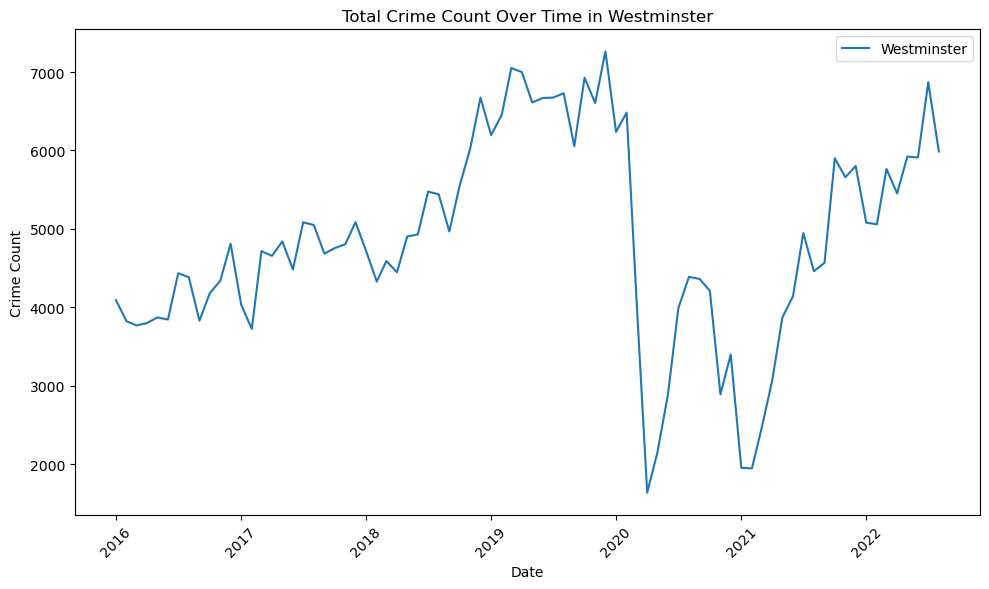

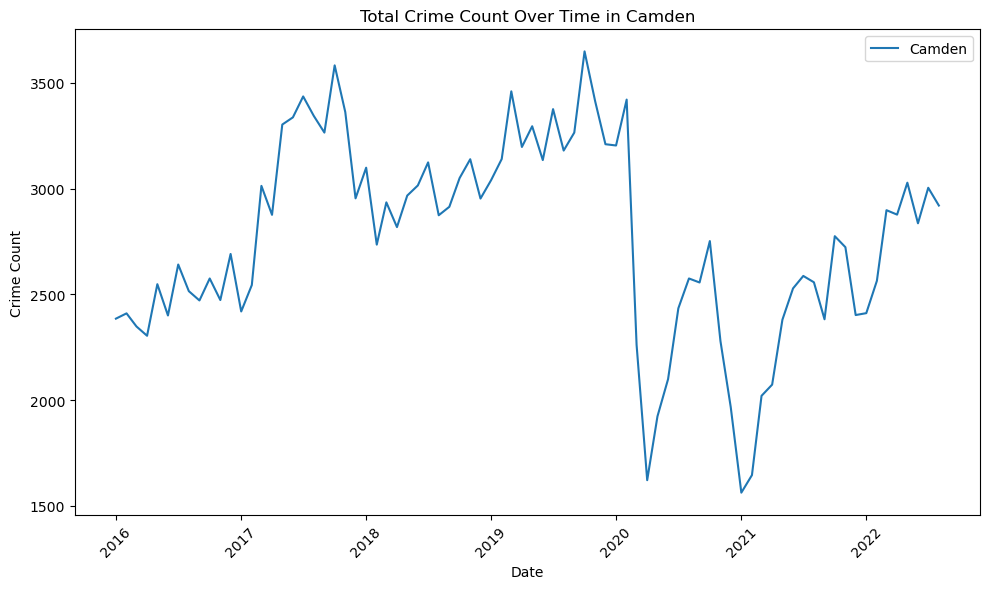

In [24]:
grouped_data = data_filtered.groupby(['Date', 'BoroughName'])['CrimeCount'].sum().reset_index()

grouped_data.set_index(['Date', 'BoroughName'], inplace=True)

boroughs_to_plot = ['Westminster', 'Camden']
for borough in boroughs_to_plot:
    borough_data = grouped_data.loc[grouped_data.index.get_level_values('BoroughName') == borough]

    plt.figure(figsize=(10, 6))
    plt.plot(borough_data.index.get_level_values('Date'), borough_data['CrimeCount'], label=borough)
    plt.title(f"Total Crime Count Over Time in {borough}")
    plt.xlabel("Date")
    plt.ylabel("Crime Count")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [25]:
data_filtered['Year'] = data_filtered['Date'].dt.year
data_filtered['Month'] = data_filtered['Date'].dt.month
data_filtered['MonthName'] = data_filtered['Date'].dt.month_name()
data_filtered['Season'] = data_filtered['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                                        else 'Spring' if x in [3, 4, 5]
                                                        else 'Summer' if x in [6, 7, 8]
                                                        else 'Fall')

print(data_filtered.head())

                       MajorText                        MinorText  \
64239  ARSON AND CRIMINAL DAMAGE                            ARSON   
64240  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE   
64241                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY   
64242                   BURGLARY           BURGLARY IN A DWELLING   
64243              DRUG OFFENCES              POSSESSION OF DRUGS   

                BoroughName       Date  CrimeCount  Year  Month MonthName  \
64239  Barking and Dagenham 2016-01-01           5  2016      1   January   
64240  Barking and Dagenham 2016-01-01         157  2016      1   January   
64241  Barking and Dagenham 2016-01-01          44  2016      1   January   
64242  Barking and Dagenham 2016-01-01         103  2016      1   January   
64243  Barking and Dagenham 2016-01-01          74  2016      1   January   

       Season  
64239  Winter  
64240  Winter  
64241  Winter  
64242  Winter  
64243  Winter  


/var/folders/98/hdrrdmtn79s14xkyfqyphdd00000gn/T/ipykernel_23399/3989419476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Year'] = data_filtered['Date'].dt.year
/var/folders/98/hdrrdmtn79s14xkyfqyphdd00000gn/T/ipykernel_23399/3989419476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = data_filtered['Date'].dt.month
/var/folders/98/hdrrdmtn79s14xkyfqyphdd00000gn/T/ipykernel_23399/3989419476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
train_data, test_data = train_test_split(data_filtered, test_size=0.2, shuffle=True)

# Display the split sizes
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")


Training set size: 59584
Testing set size: 14896


In [32]:
print(grouped_data.index)

MultiIndex([('2016-01-01', 'Barking and Dagenham'),
            ('2016-01-01',               'Barnet'),
            ('2016-01-01',               'Bexley'),
            ('2016-01-01',                'Brent'),
            ('2016-01-01',              'Bromley'),
            ('2016-01-01',               'Camden'),
            ('2016-01-01',              'Croydon'),
            ('2016-01-01',               'Ealing'),
            ('2016-01-01',              'Enfield'),
            ('2016-01-01',            'Greenwich'),
            ...
            ('2022-08-01',               'Newham'),
            ('2022-08-01',            'Redbridge'),
            ('2022-08-01', 'Richmond upon Thames'),
            ('2022-08-01',            'Southwark'),
            ('2022-08-01',               'Sutton'),
            ('2022-08-01',        'Tower Hamlets'),
            ('2022-08-01',              'Unknown'),
            ('2022-08-01',       'Waltham Forest'),
            ('2022-08-01',           'Wandsworth

/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:8

80       6000.285424
81       5791.733375
82       5840.217251
83       5897.051370
84       5950.843235
            ...     
14971    5938.693529
14972    5938.693529
14973    5938.693529
14974    5938.693529
14975    5938.693529
Name: predicted_mean, Length: 14896, dtype: float64


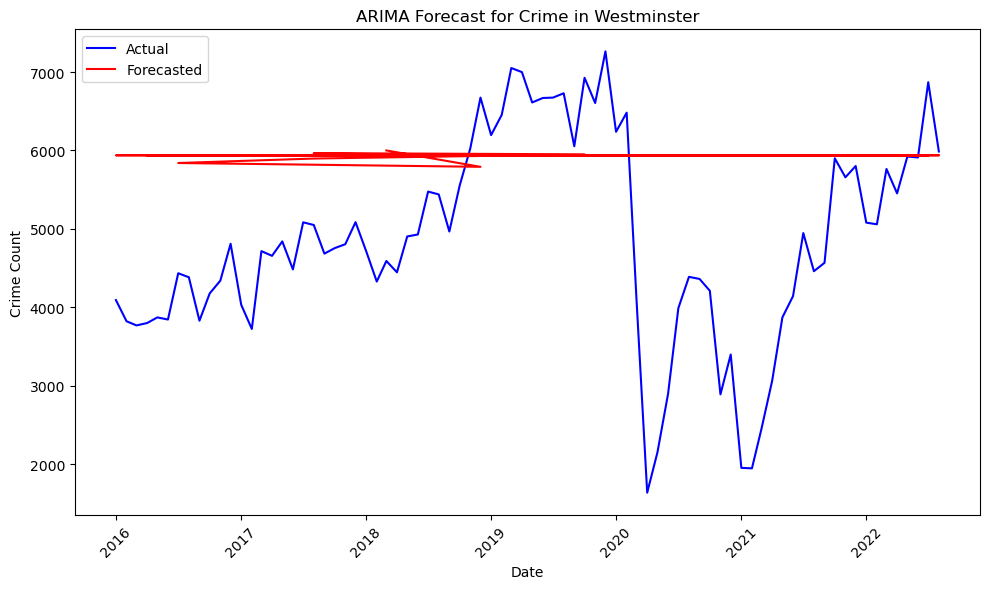

In [36]:
borough = 'Westminster'

# filtering data for the chosen borough using the index
borough_data = grouped_data[grouped_data.index.get_level_values('BoroughName') == borough]

# Train ARIMA model on the data (you may want to experiment with different orders (p, d, q))
model = ARIMA(borough_data['CrimeCount'], order = (5, 1, 0))  # (p, d, q) are hyperparameters
model_fit = model.fit()

# Make predictions on the test data
forecast = model_fit.forecast(steps=len(test_data))
print(forecast)

# Plot the forecasted values vs actual values
plt.figure(figsize=(10, 6))
plt.plot(borough_data.index.get_level_values('Date'), borough_data['CrimeCount'], label='Actual', color='blue')
plt.plot(test_data['Date'], forecast, label='Forecasted', color='red')
plt.title(f"ARIMA Forecast for Crime in {borough}")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
# Aggregate crime counts by borough
borough_crime_totals = grouped_data.groupby('BoroughName')['CrimeCount'].sum()

# Sort boroughs by total crime count in descending order
highest_crime_boroughs = borough_crime_totals.sort_values(ascending=False)

# Display the top 10 boroughs with the highest crime rates
print(highest_crime_boroughs.head(5))


BoroughName
Westminster    388935
Southwark      225900
Newham         222523
Lambeth        222397
Camden         221444
Name: CrimeCount, dtype: int64


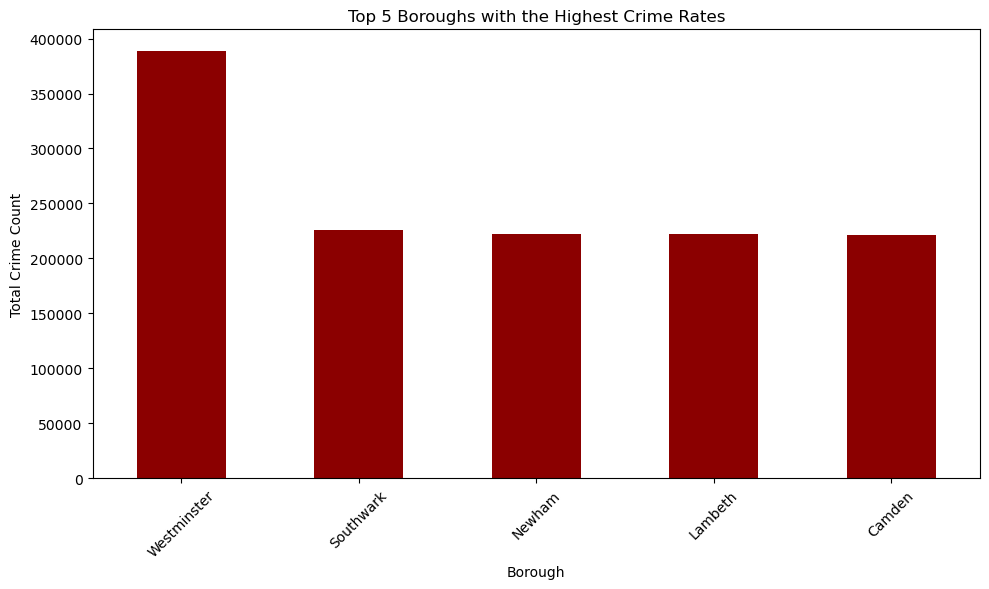

In [40]:
# Plotting the top 5 boroughs with highest crime rates
top_5_boroughs = highest_crime_boroughs.head(5)

plt.figure(figsize=(10, 6))
top_5_boroughs.plot(kind='bar', color='darkred')
plt.title("Top 5 Boroughs with the Highest Crime Rates")
plt.xlabel("Borough")
plt.ylabel("Total Crime Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


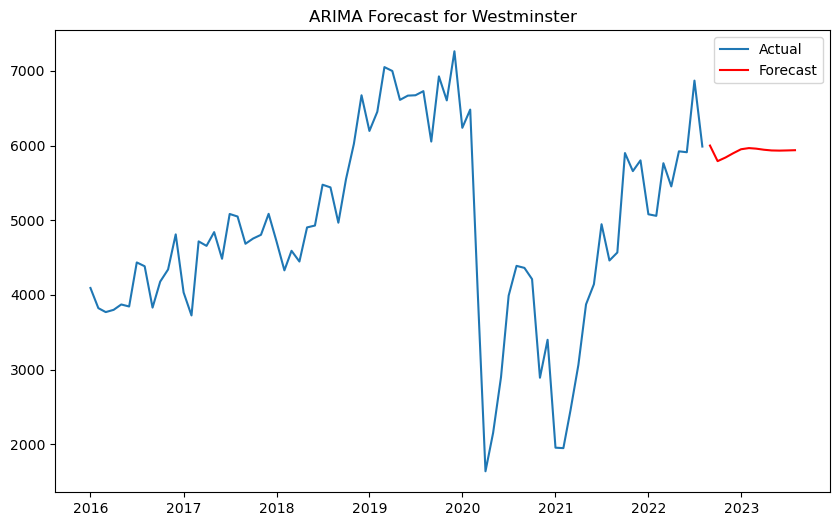

/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


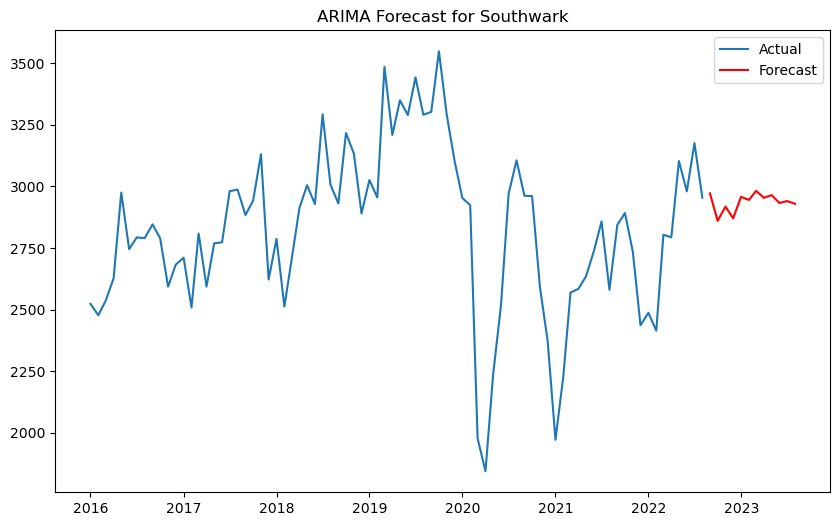

/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


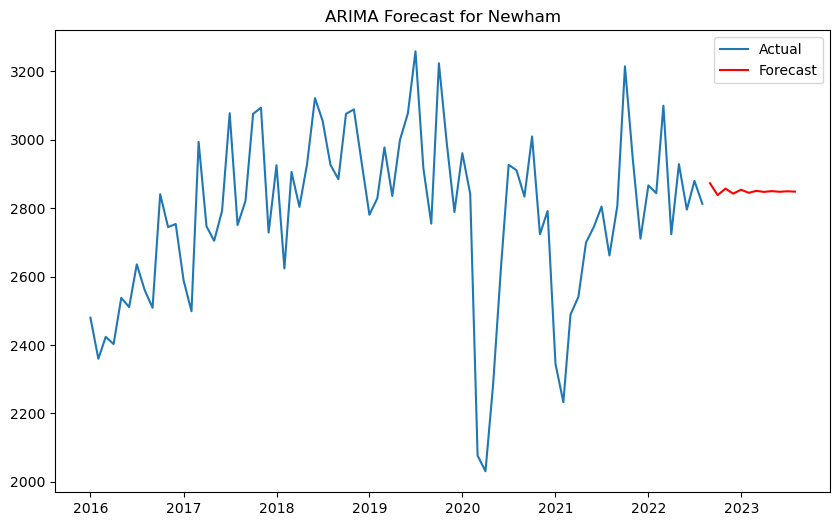

/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


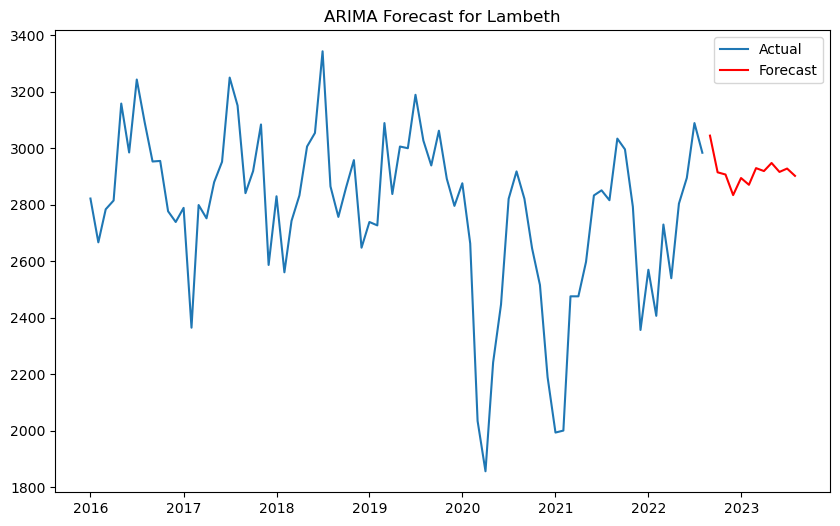

/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/strawberry/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


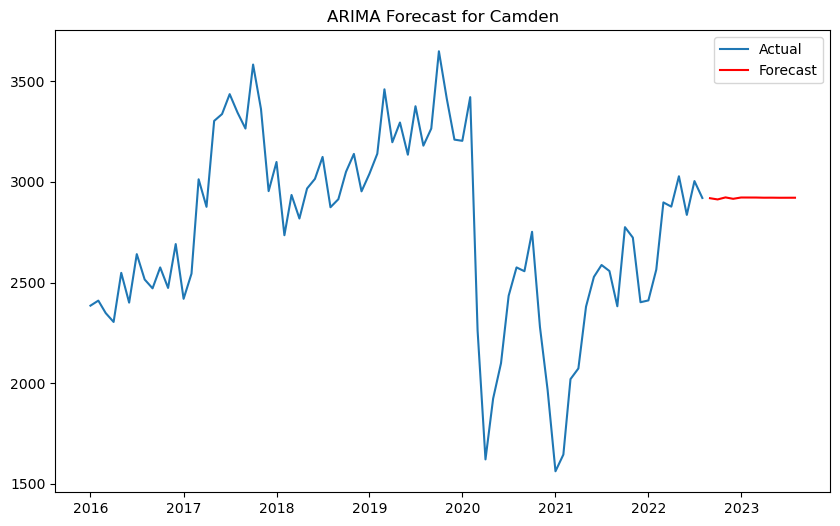

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

top_boroughs = ['Westminster', 'Southwark', 'Newham', 'Lambeth', 'Camden']  
for borough in top_boroughs:
    borough_data = grouped_data[grouped_data.index.get_level_values('BoroughName') == borough]
    
    # Ensure 'Date' is set as index
    borough_data = borough_data.reset_index(level='BoroughName').sort_index()
    
    # Train ARIMA model
    model = ARIMA(borough_data['CrimeCount'], order=(5, 1, 0)) 
    results = model.fit()
    
    # Forecast
    forecast = results.get_forecast(steps=12)  # Forecasting for 12 months
    forecast_index = pd.date_range(borough_data.index[-1], periods=12, freq='M')
    forecast_values = forecast.predicted_mean
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(borough_data.index, borough_data['CrimeCount'], label='Actual')
    plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
    plt.title(f'ARIMA Forecast for {borough}')
    plt.legend()
    plt.show()


/Users/strawberry/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


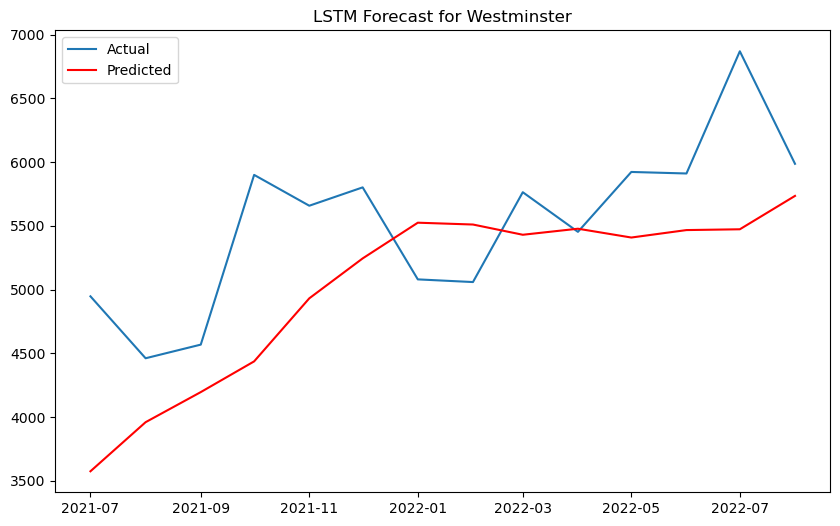

/Users/strawberry/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


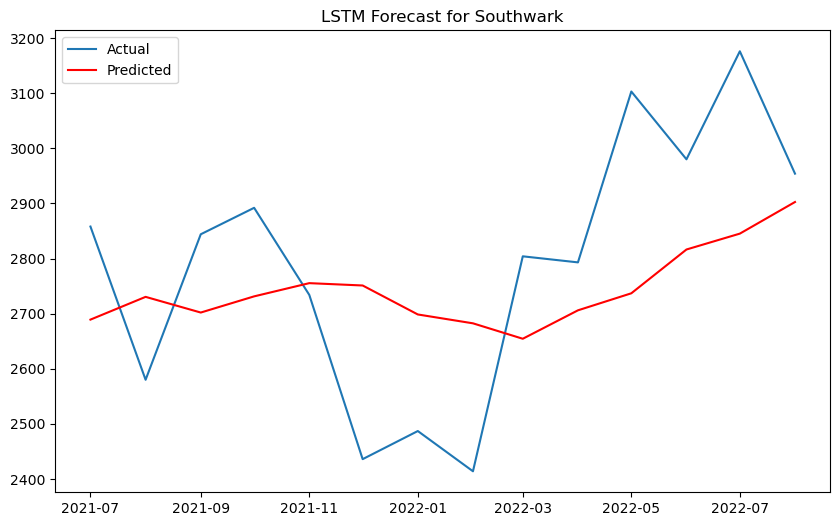

/Users/strawberry/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


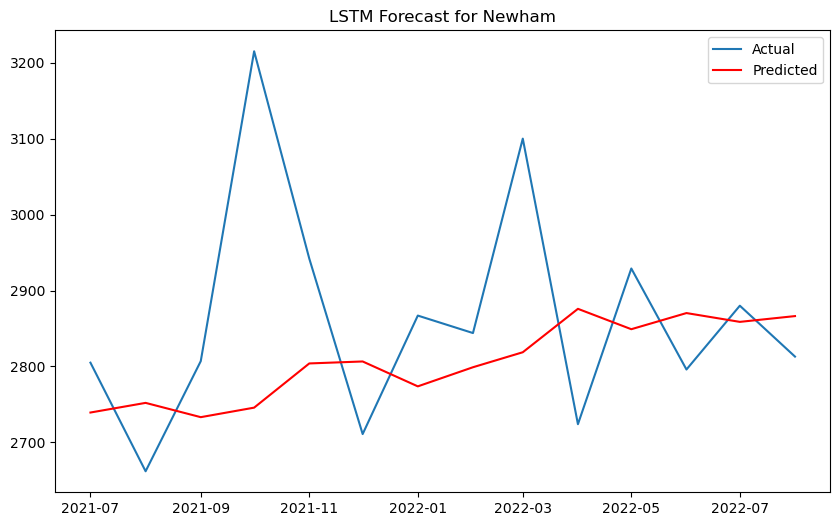

/Users/strawberry/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


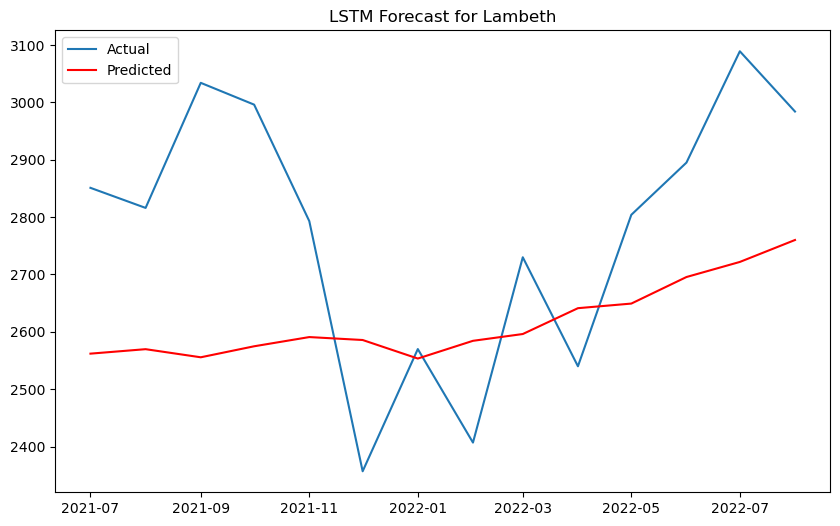

/Users/strawberry/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


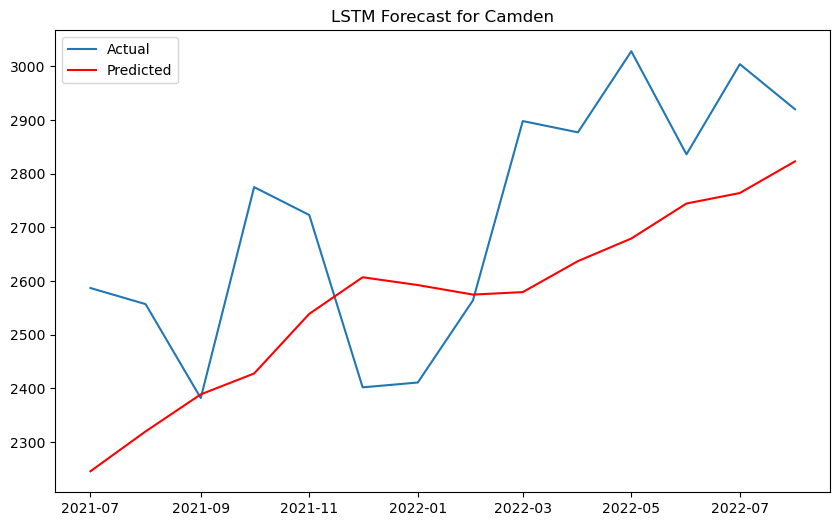

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

top_boroughs = ['Westminster', 'Southwark', 'Newham', 'Lambeth', 'Camden']  

for borough in top_boroughs:
    borough_data = grouped_data[grouped_data.index.get_level_values('BoroughName') == borough]
    borough_data = borough_data.reset_index(level='BoroughName').sort_index()
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(borough_data[['CrimeCount']])
    
    # Prepare data for LSTM
    def create_sequences(data, time_steps=12):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:i+time_steps])
            y.append(data[i+time_steps])
        return np.array(X), np.array(y)
    
    time_steps = 12
    X, y = create_sequences(scaled_data, time_steps)
    
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(borough_data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(borough_data.index[-len(y_test):], predictions, label='Predicted', color='red')
    plt.title(f'LSTM Forecast for {borough}')
    plt.legend()
    plt.show()


/var/folders/98/hdrrdmtn79s14xkyfqyphdd00000gn/T/ipykernel_23399/3846334932.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_data = borough_data.groupby('Year').sum()


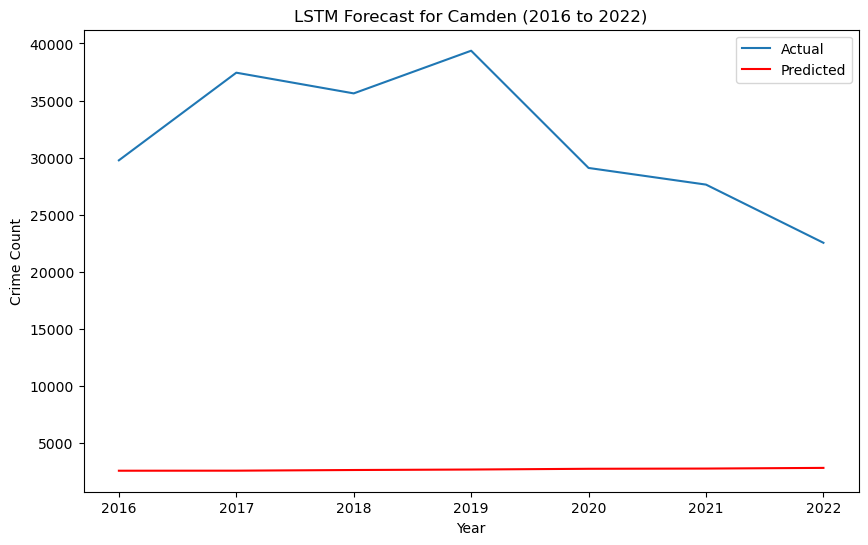

In [47]:
# Aggregate data by year
borough_data['Year'] = borough_data.index.year  # Ensure index is datetime, or use a 'Date' column
annual_data = borough_data.groupby('Year').sum()

# Define the desired year range
start_year = 2016
end_year = 2022

# Filter data for the specified year range
filtered_years = annual_data.loc[start_year:end_year]

# Separate actual and predicted values for plotting
actual_values = filtered_years['CrimeCount']
predicted_values = predictions[-len(filtered_years):].flatten()  # Match yearly data length

# Plot only the specified years
plt.figure(figsize=(10, 6))
plt.plot(filtered_years.index, actual_values, label='Actual')
plt.plot(filtered_years.index, predicted_values, label='Predicted', color='red')
plt.title(f'LSTM Forecast for {borough} ({start_year} to {end_year})')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()
